In [1]:
import pandas as pd
import numpy as np
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [2]:
df = pd.read_csv('https://docs.google.com/spreadsheets/d/e/2PACX-1vSoEMH3ZHEQ5Fph-S01XOY_r9u11YNHr7cCbdQwVNEF7XPJMvl-0cBku2wts4-IwEXuPaeEV_YJ86tu/pub?output=csv')

In [3]:
df

,Content ID,Reaction Type,Date Time,Content Type,Category,Sentiment,Score
0,97522e57-d9ab-4bd6-97bf-c24d952602d2,disgust,2020-11-07 9:43:50,photo,studying,negative,0
1,97522e57-d9ab-4bd6-97bf-c24d952602d2,dislike,2021-06-17 12:22:51,photo,studying,negative,10
2,97522e57-d9ab-4bd6-97bf-c24d952602d2,scared,2021-04-18 5:13:58,photo,studying,negative,15
3,97522e57-d9ab-4bd6-97bf-c24d952602d2,disgust,2021-01-06 19:13:01,photo,studying,negative,0
4,97522e57-d9ab-4bd6-97bf-c24d952602d2,interested,2020-08-23 12:25:58,photo,studying,positive,30
...,...,...,...,...,...,...,...
22529,75d6b589-7fae-4a6d-b0d0-752845150e56,worried,2020-10-31 4:50:14,audio,technology,negative,12
22530,75d6b589-7fae-4a6d-b0d0-752845150e56,dislike,2020-06-27 9:46:48,audio,technology,negative,10
22531,75d6b589-7fae-4a6d-b0d0-752845150e56,intrigued,2021-02-16 17:17:02,audio,technology,positive,45
22532,75d6b589-7fae-4a6d-b0d0-752845150e56,worried,2020-11-04 20:08:31,audio,technology,negative,12


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22534 entries, 0 to 22533
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Content ID     22534 non-null  object
 1   Reaction Type  22534 non-null  object
 2   Date Time      22534 non-null  object
 3   Content Type   22534 non-null  object
 4   Category       22534 non-null  object
 5   Sentiment      22534 non-null  object
 6   Score          22534 non-null  int64 
dtypes: int64(1), object(6)
memory usage: 1.2+ MB


In [5]:
#convert data type for Date Time column as date time
df['Date Time'] = pd.to_datetime(df['Date Time'])
print(df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22534 entries, 0 to 22533
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Content ID     22534 non-null  object        
 1   Reaction Type  22534 non-null  object        
 2   Date Time      22534 non-null  datetime64[ns]
 3   Content Type   22534 non-null  object        
 4   Category       22534 non-null  object        
 5   Sentiment      22534 non-null  object        
 6   Score          22534 non-null  int64         
dtypes: datetime64[ns](1), int64(1), object(5)
memory usage: 1.2+ MB
None


In [7]:
# identify top 5 performing category

category_scores = df.groupby('Category')['Score'].sum()
top_categories = category_scores.sort_values(ascending=False)
top_5_categories = top_categories.head(5)
top_5_categories


,Score
Category,
animals,68624
science,65405
healthy eating,63138
technology,63035
food,61598


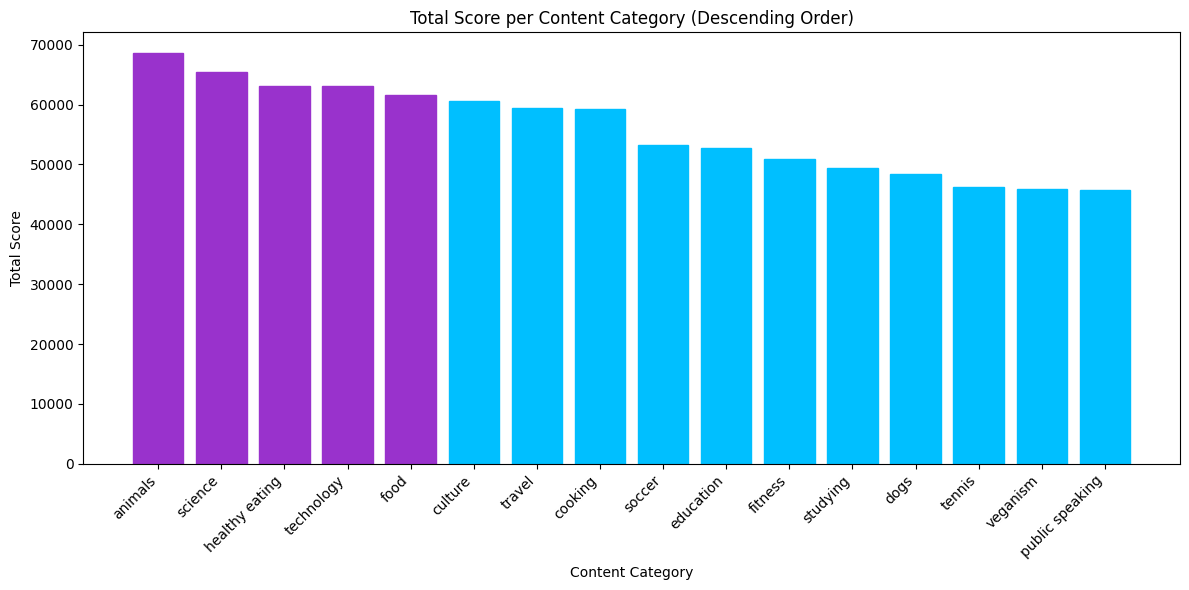

In [9]:
# count the Score for Content Category

category_sum_scores = df.groupby('Category')['Score'].sum()
category_sum_scores_sorted = category_sum_scores.sort_values(ascending=False)

plt.figure(figsize=(12, 6))
bars = plt.bar(category_sum_scores_sorted.index, category_sum_scores_sorted.values)

for i in range(min(5, len(bars))):
    bars[i].set_color('darkorchid')

for i in range(5, len(bars)):
    bars[i].set_color('deepskyblue')

plt.xlabel('Content Category')
plt.ylabel('Total Score')
plt.title('Total Score per Content Category (Descending Order)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


In [13]:
# which Content Type has higher Score

content_engagement = df.groupby('Content Type')['Score'].sum()

highest_engagement_content = content_engagement.idxmax()
highest_engagement_score = content_engagement.max()

print(f"The Content Type with the highest total score is: {highest_engagement_content} with a score of {highest_engagement_score}")


The Content Type with the highest total score is: photo with a score of 241090


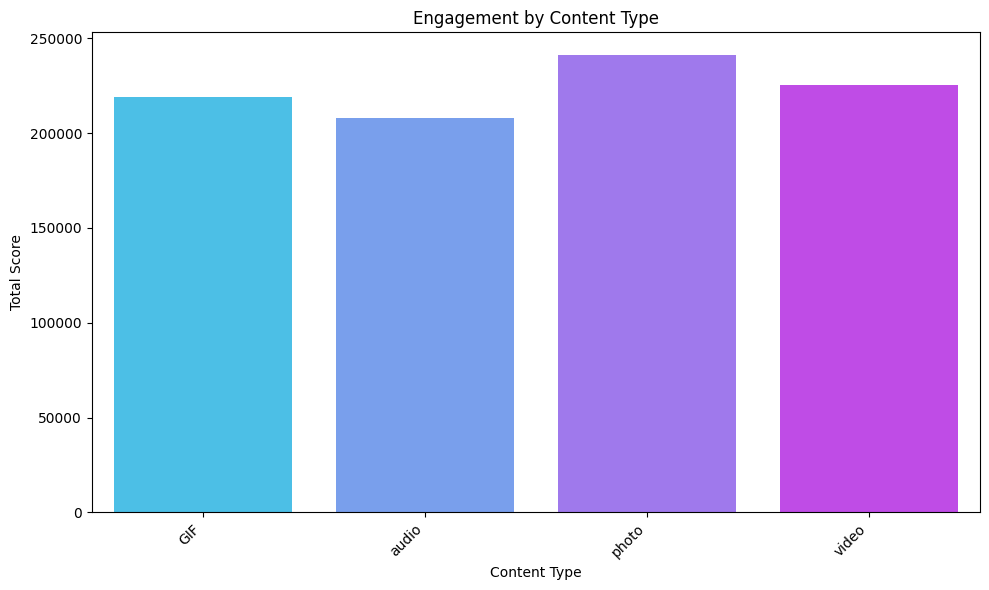

In [10]:
# analyze engagement with content based on the content type column

content_type_engagement = df.groupby('Content Type')['Score'].sum()
plt.figure(figsize=(10, 6))
sns.barplot(x=content_type_engagement.index, y=content_type_engagement.values, palette='cool')
plt.xlabel('Content Type')
plt.ylabel('Total Score')
plt.title('Engagement by Content Type')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


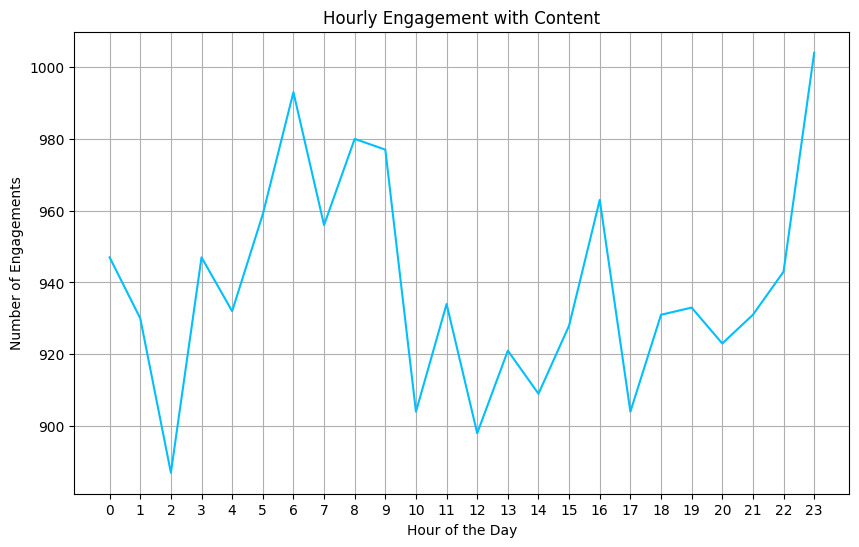

In [11]:
# what time people engage most with the content

df['Hour'] = df['Date Time'].dt.hour
hourly_engagement = df.groupby('Hour')['Content ID'].count()

plt.figure(figsize=(10, 6))
sns.lineplot(x=hourly_engagement.index, y=hourly_engagement.values, color='deepskyblue')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Engagements')
plt.title('Hourly Engagement with Content')
plt.xticks(range(24))
plt.grid(True)
plt.show()

In [14]:
# count which content type receives more of certain reaction

reaction_content_counts = df.groupby(['Reaction Type', 'Content Type']).size().unstack(fill_value=0)

print(reaction_content_counts)

max_content_per_reaction = reaction_content_counts.idxmax(axis=1)
print("\nContent type with the most reactions of each type:")
max_content_per_reaction


Content Type   GIF  audio  photo  video
Reaction Type                          
adore          363    310    401    353
cherish        336    326    367    351
disgust        339    328    389    350
dislike        344    324    350    378
hate           390    314    376    340
heart          362    362    407    366
indifferent    340    289    376    380
interested     381    337    341    366
intrigued      316    314    361    363
like           348    294    381    368
love           343    339    392    337
peeking        375    324    391    348
scared         347    324    404    361
super love     341    346    358    348
want           315    336    390    355
worried        338    318    359    364

Content type with the most reactions of each type:


,0
Reaction Type,
adore,photo
cherish,photo
disgust,photo
dislike,video
hate,GIF
heart,photo
indifferent,video
interested,GIF
intrigued,video
